In [36]:
import sys
sys.path.insert(0,"../")
import time

import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

from botorch import *
from botorch import fit_gpytorch_model
from botorch.models import HeteroskedasticSingleTaskGP
from gpytorch.mlls import ExactMarginalLogLikelihood
import torch

train_X = torch.rand(1, 1, 2)
train_Y = torch.sin(train_X).sum(dim=-1, keepdim=True)
se = torch.norm(train_X, dim=-1, keepdim=True)
train_Yvar = 0.1 + se * torch.rand_like(train_Y)

print(f"Train X: {train_X.shape} -> Train Y: {train_Y.shape} with variance: {train_Yvar.shape}")

Train X: torch.Size([1, 1, 2]) -> Train Y: torch.Size([1, 1, 1]) with variance: torch.Size([1, 1, 1])


In [48]:
se

tensor([[[0.8949]]])

In [38]:
model = HeteroskedasticSingleTaskGP(train_X, train_Y, train_Yvar).to(train_X)
mll = ExactMarginalLogLikelihood(model.likelihood, model)
fit_gpytorch_model(mll);

In [54]:
p = model.posterior(torch.cat([train_X, torch.tensor([0.1, 0.2]).view(1,1,2)]))
p

In [55]:
p.variance

tensor([[[0.3631]],

        [[3.6055]]], grad_fn=<UnsqueezeBackward0>)

In [56]:
p.mean

tensor([[[0.9166]],

        [[0.9172]]], grad_fn=<UnsqueezeBackward0>)

In [102]:
def objective(X):
    Y = torch.sin(X).sum(dim=-1, keepdim=True)
    base_var = 0.1
    se = torch.norm(X, dim=-1, keepdim=True)
    Yvar = base_var + se * torch.rand_like(Y) 
    true_var = base_var + se
    return Y, Yvar, true_var

In [117]:
torch.cartesian_prod(torch.arange(0,1,0.01), torch.arange(0,1,0.01))[:,0]

tensor([0.0000, 0.0000, 0.0000,  ..., 0.9900, 0.9900, 0.9900])

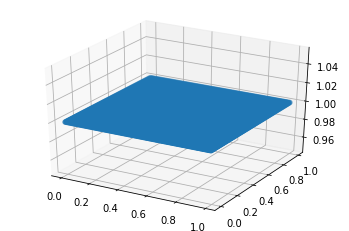

In [121]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = torch.cartesian_prod(torch.arange(0,1,0.01), torch.arange(0,1,0.01))
Y, Yvar, true_var = objective(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], 1)
plt.show()

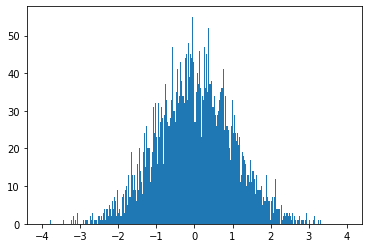

In [97]:
r = []
for i in range(10000):
    r.append(torch.randn_like(train_Y).item())
plt.hist(r, bins=np.arange(-4, 4, 0.01));